#Store_Sales - Time_Series_Forecasting

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change the directory
%cd /content/drive/MyDrive/Store_Sales_Time_Series_Forecasting

/content/drive/MyDrive/Store_Sales_Time_Series_Forecasting


## Import Panda

In [ ]:
import pandas as pd


In [ ]:
df_store = pd.read_csv("/content/drive/MyDrive/Store_Sales_Time_Series_Forecasting/datasets/stores.csv")

In [ ]:
df_store.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
df_holiday = pd.read_csv("/content/drive/MyDrive/Store_Sales_Time_Series_Forecasting/datasets/holidays_events.csv")
df_holiday.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
df_oil = pd.read_csv("/content/drive/MyDrive/Store_Sales_Time_Series_Forecasting/datasets/oil.csv")
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Store_Sales_Time_Series_Forecasting/datasets/test.csv")
df_test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Store_Sales_Time_Series_Forecasting/datasets/train.csv")
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
df_transaction = pd.read_csv("/content/drive/MyDrive/Store_Sales_Time_Series_Forecasting/datasets/transactions.csv")
df_transaction.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [17]:
df_test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [18]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [19]:
df_train.date

0          2013-01-01
1          2013-01-01
2          2013-01-01
3          2013-01-01
4          2013-01-01
              ...    
3000883    2017-08-15
3000884    2017-08-15
3000885    2017-08-15
3000886    2017-08-15
3000887    2017-08-15
Name: date, Length: 3000888, dtype: object

In [20]:
df = pd.read_csv("/content/drive/MyDrive/Store_Sales_Time_Series_Forecasting/datasets/train.csv",
                 parse_dates=['date'])
df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


## Import time

In [22]:
import numpy as np
df['time'] = np.arange(len(df.date))
df.head()

,id,date,store_nbr,family,sales,onpromotion,time
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0
1,1,2013-01-01,1,BABY CARE,0.0,0,1
2,2,2013-01-01,1,BEAUTY,0.0,0,2
3,3,2013-01-01,1,BEVERAGES,0.0,0,3
4,4,2013-01-01,1,BOOKS,0.0,0,4


<ipython-input-23-214d6bd4f965>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


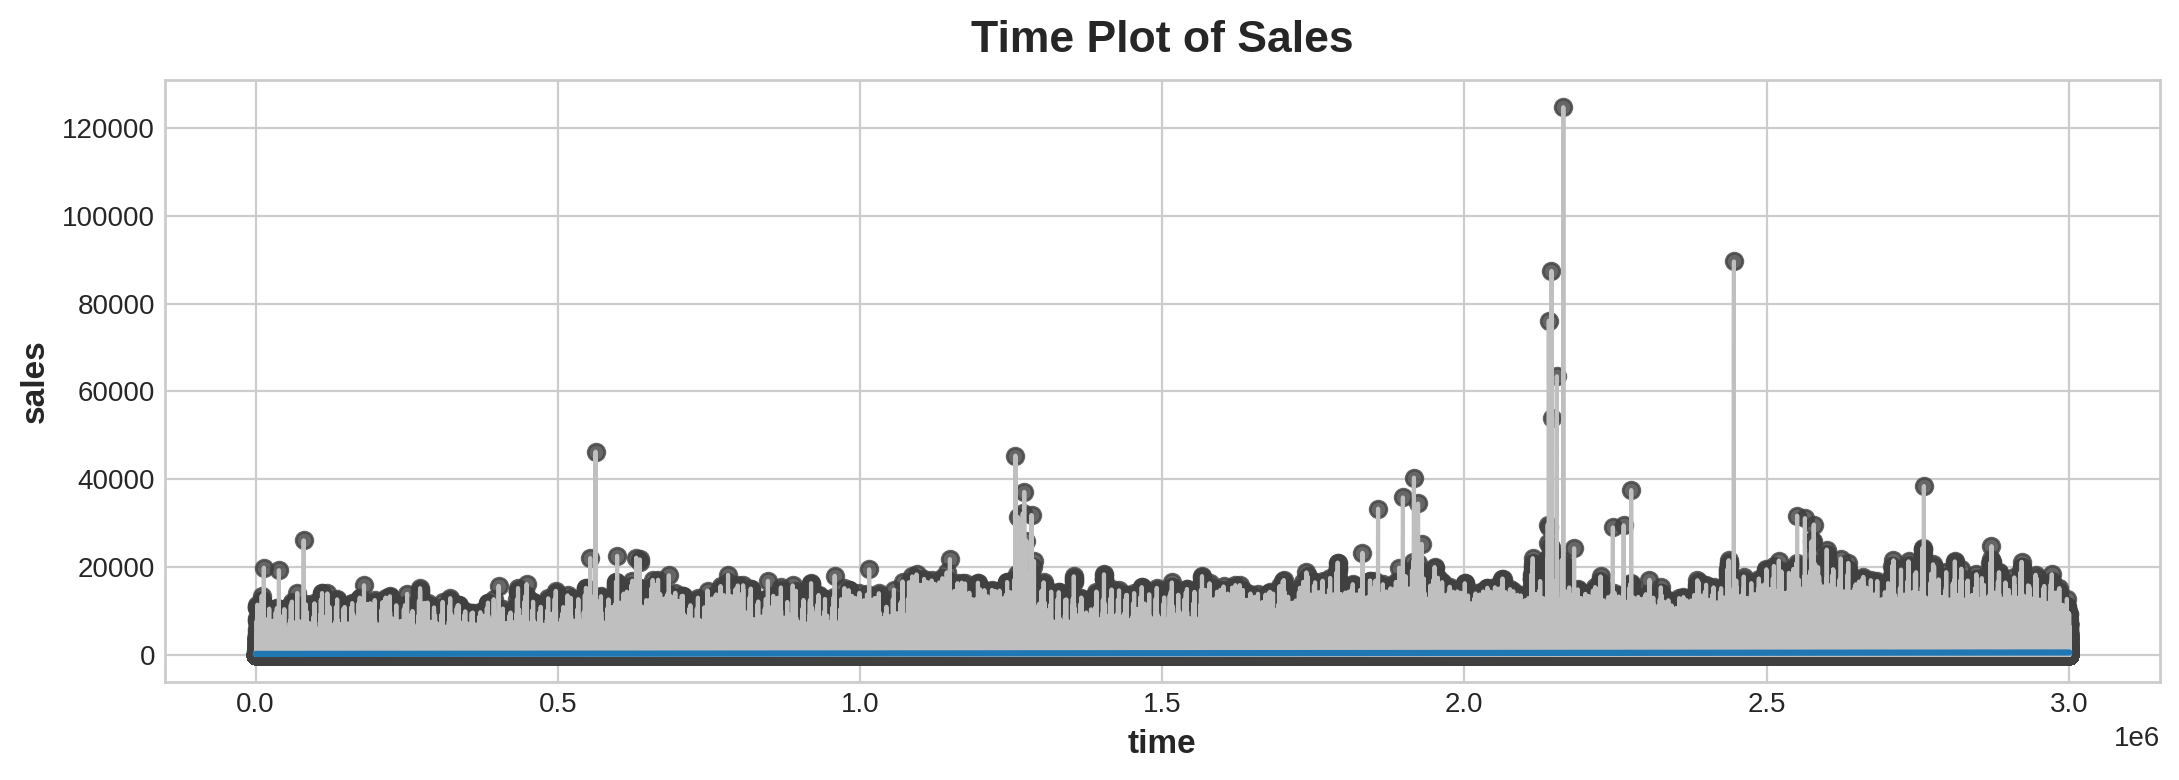

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('time', 'sales', data=df, color='0.75')
ax = sns.regplot(x='time', y='sales', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Sales');


## Lag Feature


In [25]:
df['Lag_1'] = df['sales'].shift(1)
df = df.reindex(columns=['sales', 'Lag_1'])

df

,sales,Lag_1
0,0.000,NaN
1,0.000,0.000
2,0.000,0.000
3,0.000,0.000
4,0.000,0.000
...,...,...
3000883,438.133,6.000
3000884,154.553,438.133
3000885,2419.729,154.553
3000886,121.000,2419.729


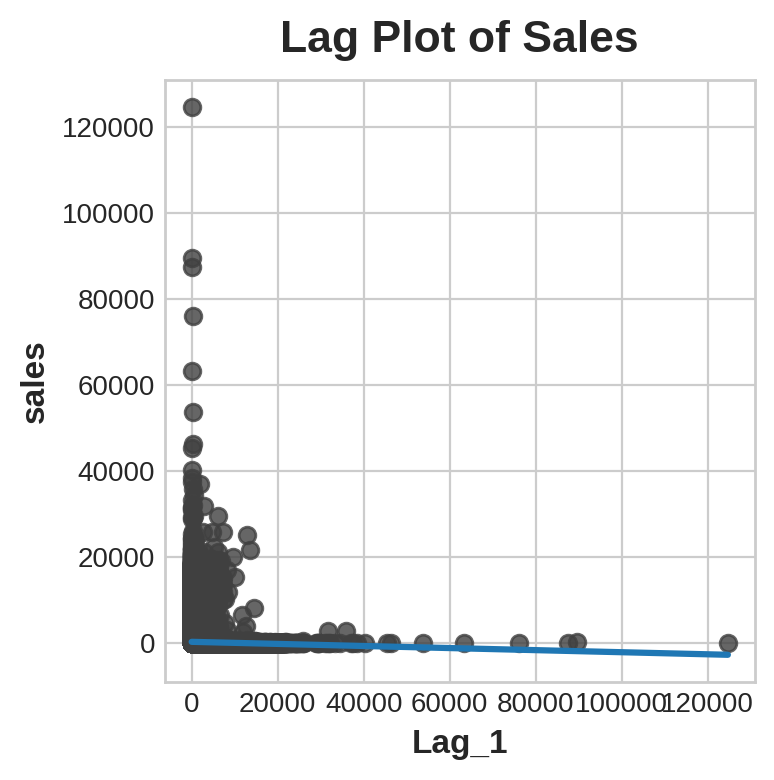

In [26]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='sales', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Sales');

In [27]:
df

,sales,Lag_1
0,0.000,NaN
1,0.000,0.000
2,0.000,0.000
3,0.000,0.000
4,0.000,0.000
...,...,...
3000883,438.133,6.000
3000884,154.553,438.133
3000885,2419.729,154.553
3000886,121.000,2419.729


In [28]:
df = df.drop('Lag_1', axis=1)
df

,sales
0,0.000
1,0.000
2,0.000
3,0.000
4,0.000
...,...
3000883,438.133
3000884,154.553
3000885,2419.729
3000886,121.000


## Splitting X, y

In [30]:
X = df.drop('sales', axis=1).values
y = df['sales'].values

In [31]:
X

array([], shape=(3000888, 0), dtype=float64)

In [32]:
y

array([   0.   ,    0.   ,    0.   , ..., 2419.729,  121.   ,   16.   ])

# Import Sklearn Model

In [29]:
from sklearn.model_selection import train_test_split


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)